# <center> Исследование данных HR-агентства


## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Данные для исследования: [ссылка](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ds_salaries.zip)

Оригинальный датасет: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

Необходимо исследовать данные и сделать выводы по полученным результатам. Визуализировать выводы и рассуждения, и с помощью статистического тестирования проверить, являются ли выводы статистически значимыми. Найти закономерности и отметить их

В процессе анализа необдходимо:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

2. А также ответить на ключевые вопросы HR-агентства:
    - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

### Данные содержат следующие столбцы:

 1. work_year - Год, в котором была выплачена зарплата.

 2. experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:
    - EN — Entry-level/Junior;
    - MI — Mid-level/Intermediate;
    - SE — Senior-level/Expert;
    - EX — Executive-level/Director.

3. employment_type - Тип трудоустройства для этой роли:
    - PT — неполный рабочий день;
    - FT — полный рабочий день;
    - CT — контракт;
    - FL — фриланс.

4. job_title - 	Роль, в которой соискатель работал в течение года.

5. salary - Общая выплаченная валовая сумма заработной платы.

6. salary_currency - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

7. salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).

8. employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

9. remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
    - 0 — удалённой работы нет (менее 20 %);
    - 50 — частично удалённая работа;
    - 100 — полностью удалённая работа (более 80 %).


10. company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

11. company_size - Среднее количество людей, работавших в компании в течение года:
    - S — менее 50 сотрудников (небольшая компания);
    - M — от 50 до 250 сотрудников (средняя компания);
    - L — более 250 сотрудников (крупная компания).


## Загрузка и обработка данных

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from statsmodels.stats.descriptivestats import sign_test

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook")
custom_colors = ['#C46C98', '#2A9D8F']
sns.set_palette(custom_colors)
from matplotlib.colors import ListedColormap
custom_colors2 = ListedColormap(['#C46C98', '#2A9D8F', '#EBDCE6'])

In [3]:
# Загружаем датасет
data = pd.read_csv('C:/IDE/sf/skillfactory/Projects/ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА/data/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## 1. Описательный анализ данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений). Типы всех данных подходят для дальнейшего исследования.

Удалим неинформативные признаки и проверим датасет на наличие полных дубликатов и удалим их:

In [6]:
# Удалим неинформативный признак
data = data.drop(['Unnamed: 0'], axis=1)

# Так как данные о зп дублируются в нескольких признаках, можно удалить salary и salary_currency

data = data.drop([('salary'), ('salary_currency')], axis=1)

In [7]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов и неинформативных признаков: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов и неинформативных признаков: (565, 9)


Основные статистические характеристики для каждого из признаков:

In [8]:
# Определение категориальных и числовых признаков
cat_features = ['remote_ratio', 'work_year', 'experience_level', 
                'employment_type', 'job_title', 'employee_residence', 
                'company_location', 'company_size']

num_features = ['salary_in_usd']

## 2. Разведывательный анализ данных

### Визуальный анализ данных

Сделем базовый анализ для каждого признака, участвующего в исследовании:

#### Распределение числового признака 'salary_in_usd'

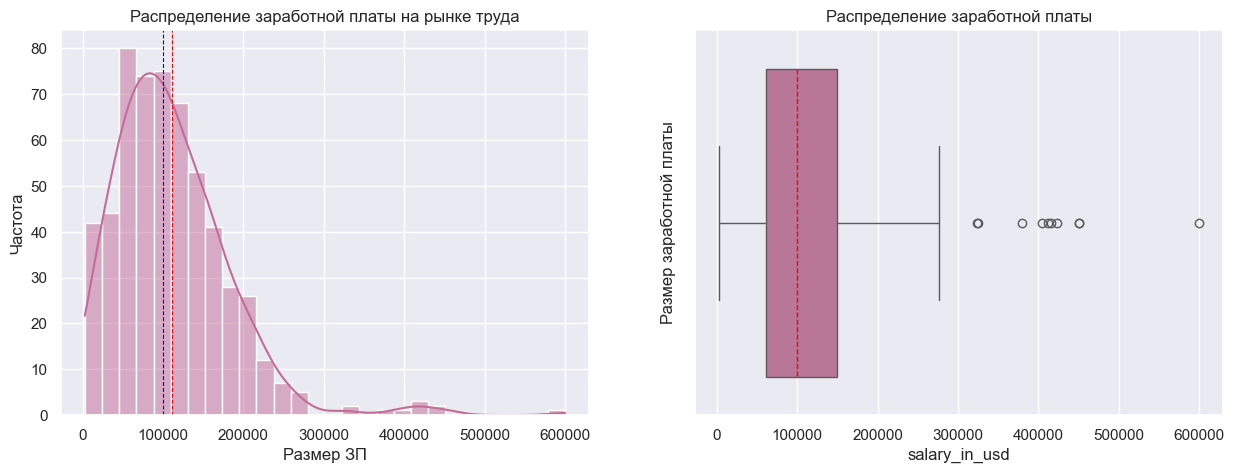

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер ЗП', ylabel='Частота')
axes[0].set_title('Распределение заработной платы на рынке труда')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
axes[0].axvline(data['salary_in_usd'].median(), color='blue', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы')

plt.show()

In [10]:
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер ЗП']
data_agg

,Размер ЗП
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


Распределение заработной платы отлично от нормального, в данных есть выбросы.
Средний размер ЗП составляет 110610$, минимальный уровень ЗП равен 2859$, максимальный - 600000$.

***

#### Распределение категориальных признаков:

Визуализация распределения данных по количеству записей в разные года

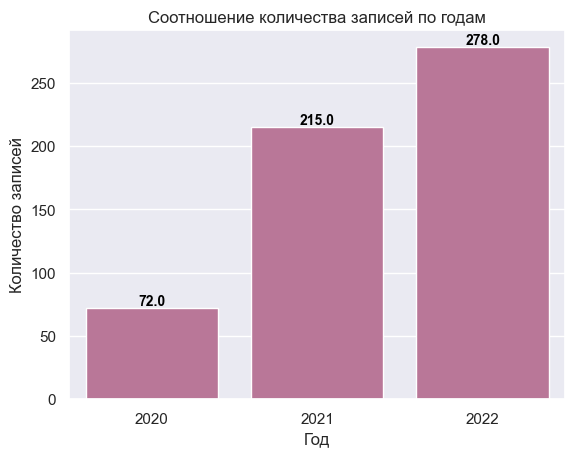

In [11]:
ax = sns.countplot(data=data, x=data['work_year'])
ax.set(xlabel='Год', ylabel='Количество записей')
plt.title('Соотношение количества записей по годам')

# добавление аннотаций
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')


plt.show()

Наблюдается заметный рост числа вакансий, но неясно, связано ли это с методом сбора данных/доступной информацией или с реальным увеличением числа вакансий за последние годы.

***

Визуализация распределения данных по количеству записей в зависимости от типа удаленной работы

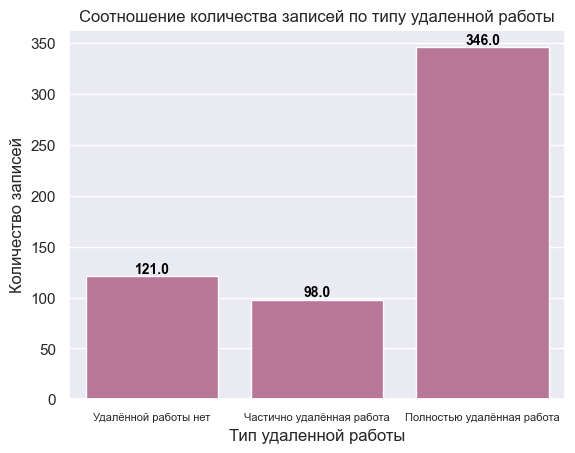

In [12]:
ax = sns.countplot(data=data, x=data['remote_ratio'])
ax.set(xlabel='Тип удаленной работы', ylabel='Количество записей')
plt.title('Соотношение количества записей по типу удаленной работы')

# Установка позиций меток для оси X
unique_values = data['remote_ratio'].unique()  # Получаем уникальные значения
ax.set_xticks(range(len(unique_values)))  # Устанавливаем индексы для меток
ax.set_xticklabels(["Удалённой работы нет", "Частично удалённая работа", "Полностью удалённая работа"], size=8)

# Добавление аннотаций для каждого столбца
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

In [13]:
data['remote_ratio'].value_counts()

remote_ratio
100    346
0      121
50      98
Name: count, dtype: int64

Больше всего записей с полностью удаленной работой(346), далее записи без удаленной работы(121), минимальное количество записей с частично удаленной работой(98)

***

Визуализация распределения данных по количеству записей в зависимости от опыта работы

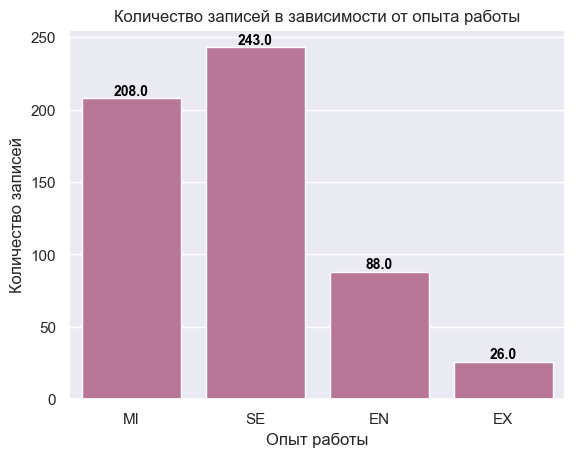

In [14]:
ax = sns.countplot(data=data, x='experience_level')
ax.set(xlabel='Опыт работы', ylabel='Количество записей')
plt.title('Количество записей в зависимости от опыта работы')

# Добавление аннотаций для каждого столбца
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
plt.show()

In [15]:
data['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

Наибольшее число записей с опытом работы SE — Senior-level/Expert: 243,

Наименьшее - EX — Executive-level/Director: 26,

MI — Mid-level/Intermediate: 208,

EN — Entry-level/Junior: 88 записей.

***

Визуализация распределения данных по типу трудоустройства:

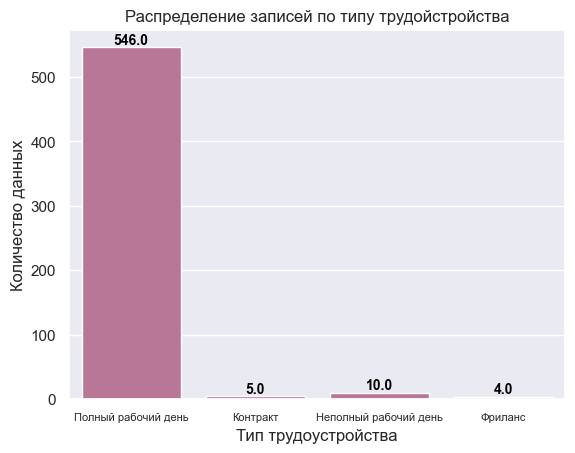

In [16]:
ax = sns.countplot(data=data, x=data['employment_type'])
ax.set(xlabel='Тип трудоустройства', ylabel='Количество данных')
plt.title('Распределение записей по типу трудойстройства')

# Установка позиций меток для оси X
unique_values = data['employment_type'].unique()  # Получаем уникальные значения
ax.set_xticks(range(len(unique_values)))  # Устанавливаем индексы для меток
ax.set_xticklabels(["Полный рабочий день", "Контракт", "Неполный рабочий день", "Фриланс"], size=8)

# Добавление аннотаций для каждого столбца
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

In [17]:
data['employment_type'].value_counts()

employment_type
FT    546
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [18]:
data['employment_type'].value_counts(normalize=True)

employment_type
FT    0.966372
PT    0.017699
CT    0.008850
FL    0.007080
Name: proportion, dtype: float64

Тип трудоустройства "Полный рабочий день" составляет 96% всех данных (546 записей), меньше всего записей у типа "Фриланс": 4 записи.

***

Визуализация Топ-10 должностей по количеству записей:

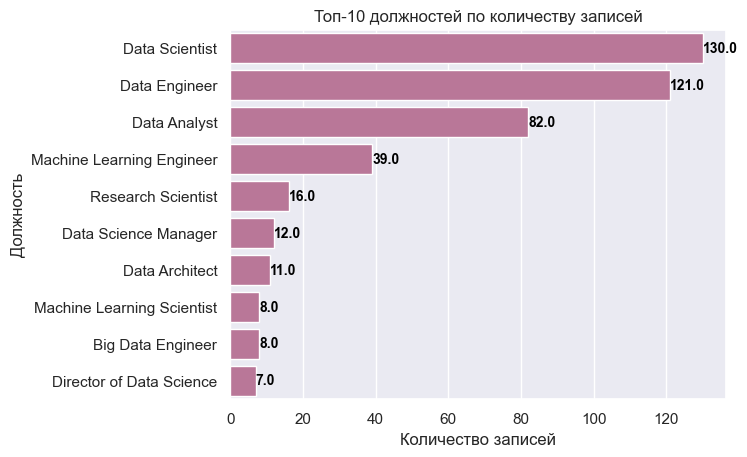

In [19]:
# Получаем топ 10 должностей
jt_data = data['job_title'].value_counts().sort_values(ascending=False).head(10)

# Строим график
ax = sns.barplot(y=jt_data.index, x=jt_data.values)
ax.set(xlabel='Количество записей', ylabel='Должность')
plt.title('Топ-10 должностей по количеству записей')

# Добавление аннотаций для каждого столбца
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()

In [20]:
data['job_title'].value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

In [21]:
round(sum(data['job_title'].value_counts(normalize=True).head(3)),2)

0.59

Топ-3 должностей составляет почти 60% от общего количества записей:
Data Scientist - 130 записей, Data Engineer - 121, Data Analyst - 82


***

Распределение стран главных офисов работодателей и стран проживания сотрудников по количеству данных

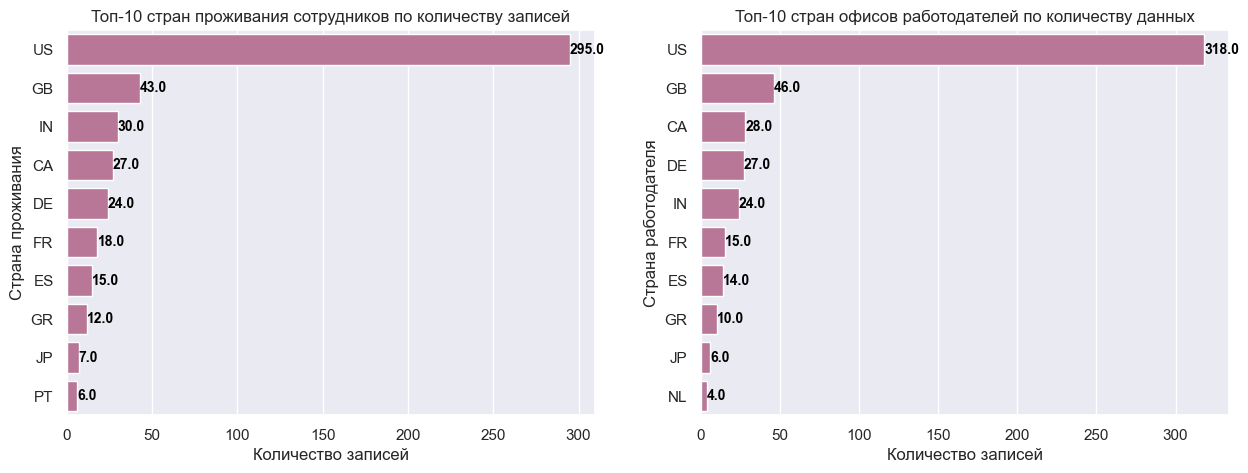

In [22]:
# Топ-10 стран проживания сотрудников
er_data = data['employee_residence'].value_counts().sort_values(ascending=False).head(10)

# Топ-10 стран офисов работодателей
cl_data = data['company_location'].value_counts().sort_values(ascending=False).head(10)

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Строим график для стран проживания сорудников
sns.barplot(y=er_data.index, x=er_data.values, ax=axes[0])
axes[0].set(xlabel='Количество записей', ylabel='Страна проживания')
axes[0].set_title('Топ-10 стран проживания сотрудников по количеству записей')

# Добавление аннотаций
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width()}', 
                     (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', fontsize=10, color='black', fontweight='bold')


# Строим график для стран работодателей
sns.barplot(y=cl_data.index, x=cl_data.values, ax=axes[1])
axes[1].set(xlabel='Количество записей', ylabel='Страна работодателя')
axes[1].set_title('Топ-10 стран офисов работодателей по количеству данных')

# Добавление аннотаций
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width()}', 
                     (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Отображаем график
plt.show()

США являются лидером как по количеству специалистов - 295, так и по количеству работодателей - 318. Великобритания занимает второе место и по количеству специалистов - 43, и по количеству работодатлей - 46, а Индия и Канада демонстрируют разные тенденции: Индия экспортирует IT-специалистов - 30, а Канада развивает бизнес-среду для работодателей - 28.


***

Распределение количества записей по размеру компании

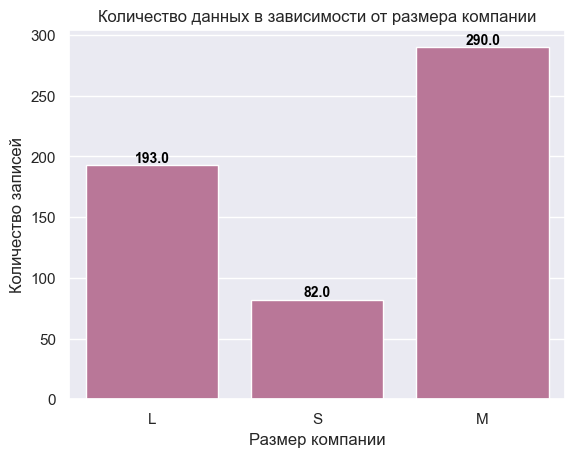

In [23]:
ax = sns.countplot(data=data, x=data['company_size'])
ax.set(xlabel='Размер компании', ylabel='Количество записей')
plt.title('Количество данных в зависимости от размера компании')

# Добавление аннотаций для каждого столбца
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

In [24]:
data['company_size'].value_counts()

company_size
M    290
L    193
S     82
Name: count, dtype: int64

Большинство сотрудников работают в средних компаниях: 290 человек, в больших компаниях работает 193 человека, в маленьких - 82.

***

## Влияние различных признаков на уровень ЗП

***

#### Уровень заработной платы в зависимости от опыта работы

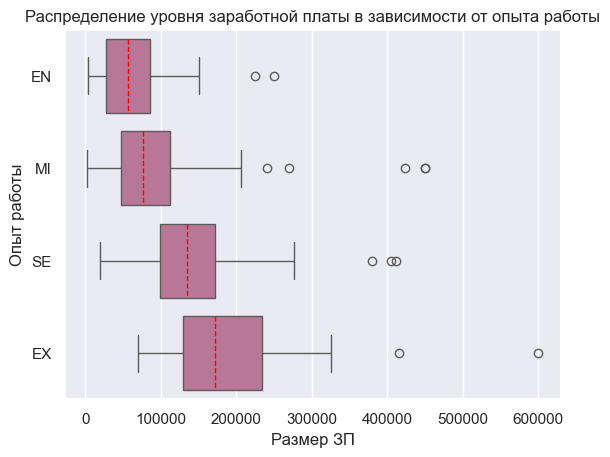

In [25]:
# задаем порядок вывода категорий опыта работы от младшего к старшему уровню
experience_order = ['EN', 'MI', 'SE', 'EX']  

ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', order=experience_order,  orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Опыт работы')
plt.title('Распределение уровня заработной платы в зависимости от опыта работы')
plt.show()

In [26]:
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2).sort_values(by='mean')
print('Уровень заработной платы в зависимости от года ')
data_agg

Уровень заработной платы в зависимости от года 


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0


На графике видно, что с увеличением опыта работы увеличивается уровень заработной платы.

У специалистов уровня Entry-level/Junior средний доход за год составляет 61643$, У Mid-level/Intermediate - 87793$, Senior-level/Expert зарабатывают  среднем 138375$, а Executive-level/Director - 199392$. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

***

#### Уровень заработной платы в зависимости от типа трудоустройства

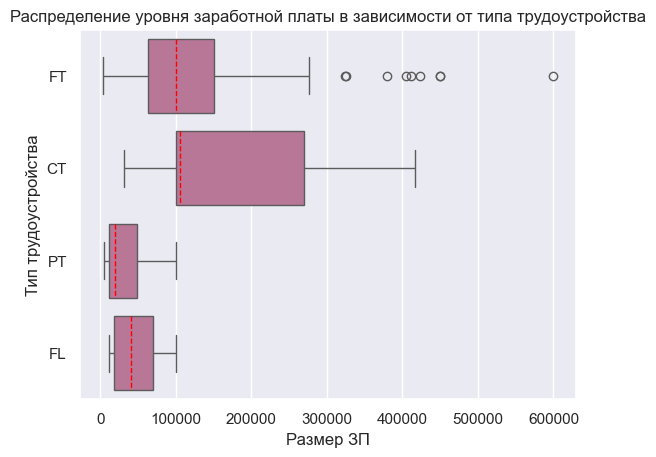

In [27]:
# Строим boxplot
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Тип трудоустройства')
plt.title('Распределение уровня заработной платы в зависимости от типа трудоустройства')
plt.show()

In [28]:
data_agg = data.groupby('employment_type')['salary_in_usd'].describe().round(2).sort_values(by='mean')
print('Уровень заработной платы в зависимости от типа трудоустройства ')
data_agg

Уровень заработной платы в зависимости от типа трудоустройства 


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
PT,10.0,33070.50,31472.91,5409.0,12000.0,18817.5,48370.0,100000.0
FL,4.0,48000.00,40529.82,12000.0,18000.0,40000.0,70000.0,100000.0
FT,546.0,111811.84,70790.70,2859.0,62726.0,100000.0,150000.0,600000.0
CT,5.0,184575.00,156250.89,31875.0,100000.0,105000.0,270000.0,416000.0


На графике видно, что уровень ЗП зависит от типа трудоустройства: самый большой разброс зарплат и наибольшее среднее значение(184575$) наблюдается у сотрудников по контракту (CT), что может быть связано с особенностями оплаты труда в зависимости от проекта или уровня квалификации. Постоянная работа (FT) имеет средний уровень зп равный 111812$, но с меньшим разбросом по сравнению с контрактными сотрудниками.
Частичная занятость(PT) и фриланс(FL) имеют наименьший диапазон зарплат, а их средние значения ниже: 33071$ и 48000$ соответственно, что может отражать специфику таких форм занятости (меньше рабочих часов, оплата по проектам и т. д.).
Выбросы в категориях CT и FL могут указывать на редкие высокооплачиваемые вакансии.

С помощью статистического тестирования необходимо определить, являются ли эти различия статистически значимыми.

***

#### Уровень заработной платы в зависимости от должности

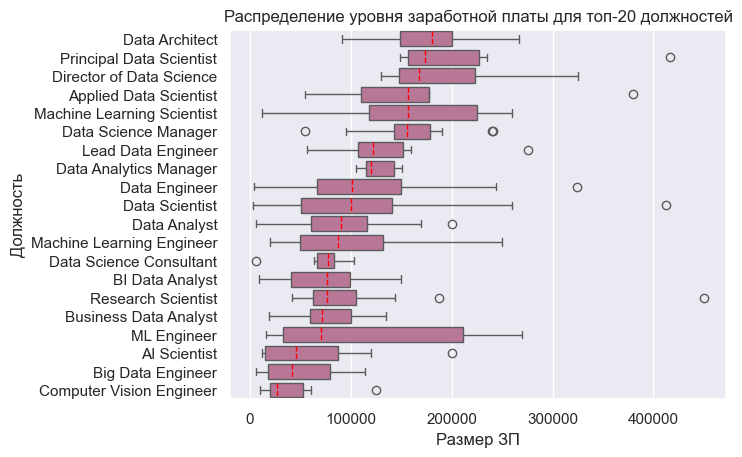

In [29]:
# Фильтруем данные которые входят в топ 20 должностей по количествцу записей
top_jobs = data['job_title'].value_counts().head(20).index
filtered_data = data[data['job_title'].isin(top_jobs)]

# Вычисляем медианы зарплат по каждой должности и сортируем их
median_salaries = filtered_data.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

# Строим boxplot с сортировкой по медиане
ax = sns.boxplot(data=filtered_data, x='salary_in_usd', y='job_title', 
                 order=median_salaries.index, orient='h', 
                 medianprops={"color": "red", "linestyle": '--'})

ax.set(xlabel='Размер ЗП', ylabel='Должность')
plt.title('Распределение уровня заработной платы для топ-20 должностей')
plt.show()

In [30]:
# Группировка и расчет описательной статистики
data_agg = round(filtered_data.groupby('job_title')['salary_in_usd'].describe(),2)

# Добавление столбца с медианой
data_agg['median'] = data.groupby('job_title')['salary_in_usd'].median()

# Сортировка по медиане
data_agg_sorted = data_agg.sort_values(by='median', ascending=False).head(20)

data_agg_sorted

,count,mean,std,min,25%,50%,75%,max,median
job_title,,,,,,,,,
Data Architect,11.0,177873.91,45714.72,90700.0,148900.00,180000.0,200669.50,266400.0,180000.0
Principal Data Scientist,7.0,215242.43,94705.04,148261.0,156837.00,173762.0,227500.00,416000.0,173762.0
Director of Data Science,7.0,195074.00,70015.79,130026.0,147756.50,168000.0,223489.50,325000.0,168000.0
Applied Data Scientist,5.0,175655.00,123647.19,54238.0,110037.00,157000.0,177000.00,380000.0,157000.0
Machine Learning Scientist,8.0,158412.50,79514.71,12000.0,118075.00,156500.0,225000.00,260000.0,156500.0
Data Science Manager,12.0,158328.50,52589.18,54094.0,142285.25,155750.0,178050.00,241000.0,155750.0
Lead Data Engineer,6.0,139724.50,74845.89,56000.0,106916.75,121593.5,151250.00,276000.0,121593.5
Data Analytics Manager,7.0,127134.29,17853.38,105400.0,114640.00,120000.0,142500.00,150260.0,120000.0
Data Engineer,121.0,109750.03,58203.68,4000.0,66022.00,100800.0,150000.00,324000.0,100800.0


Руководящие должности и вакансии, связанные с глубокими техническими знаниями, имеют самые высокие зарплаты (руководитель отдела данных, директор по обработке данных).
Для аналитических и исследовательских должностей зарплаты варьируются меньше, но остаются привлекательными из-за своей стабильности (специалист по обработке данных, аналитик данных). Специализации, связанные с машинным обучением и инженерией данных, являются наиболее конкурентоспособными с точки зрения уровня заработной платы.

***

#### Уровень заработной платы в зависимости от типа удаленной работы

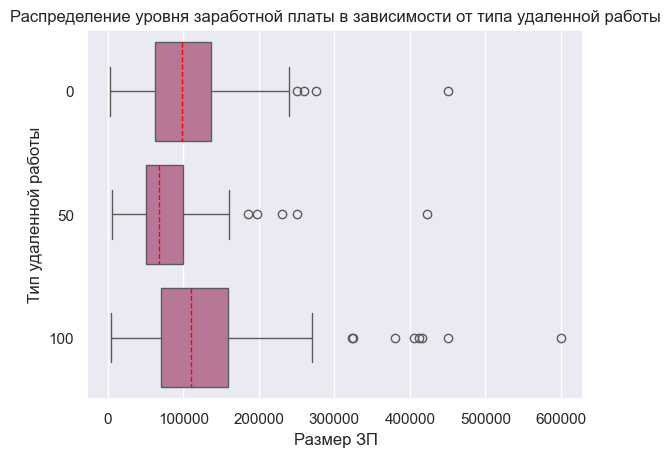

In [31]:
# Строим boxplot
ax = sns.boxplot(data, x='salary_in_usd', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Тип удаленной работы')
plt.title('Распределение уровня заработной платы в зависимости от типа удаленной работы')
plt.show()

In [32]:
data_agg = round(filtered_data.groupby('remote_ratio')['salary_in_usd'].describe(),2)

# Добавление столбца с медианой
data_agg['median'] = data.groupby('remote_ratio')['salary_in_usd'].median()

# Сортировка по медиане
data_agg_sorted = data_agg.sort_values(by='median', ascending=False).head(20)

data_agg_sorted

,count,mean,std,min,25%,50%,75%,max,median
remote_ratio,,,,,,,,,
100,303.0,117433.24,67084.52,4000.0,69741.00,110500.0,154300.0,416000.0,110712.5
0,110.0,106517.86,69196.72,2859.0,64137.25,98579.0,135750.0,450000.0,98158.0
50,83.0,75448.02,44967.75,5707.0,48772.50,63831.0,95389.0,250000.0,68010.5


У сотрудников без удаленной работы медианная зарплата(98158$) выше, чем у сотрудников, работающих частично удаленно(68010.5$).
У полностью удаленных сотрудников медиана(110712.5$) находится выше, чем у тех, кто работает в офисе.

***

#### Уровень заработной платы в зависимости от страны работодателя и страны проживания сотрудника


In [33]:
data['company_location'].value_counts().head(15)

company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
PT      4
PL      4
AT      4
MX      3
DK      3
Name: count, dtype: int64

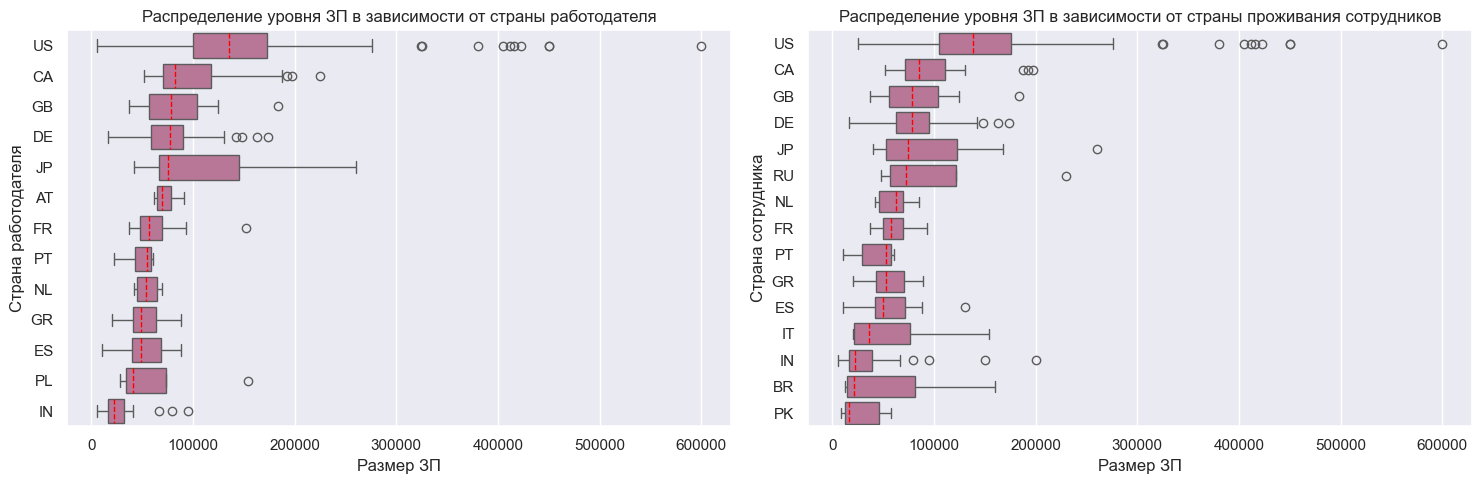

In [34]:
# Фильтруем данные по странам работодателей, возьмем только те, которые имеют более 3х записей
top_location = data['company_location'].value_counts().head(13).index
filtered_location = data[data['company_location'].isin(top_location)]

# Вычисляем медианы зарплат по каждой стране и сортируем их для графика
median_salaries = filtered_location.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False)

# Топ-15 стран проживания сотрудников
top_er = data['employee_residence'].value_counts().head(15).index
filtered_er = data[data['employee_residence'].isin(top_er)]

# Вычисляем медианы зарплат по каждой стране и сортируем их для графика
median_salaries_er = filtered_er.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False)

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Строим график для стран работодателей с сортировкой по медиане
sns.boxplot(data=filtered_location, x='salary_in_usd', y='company_location', ax=axes[0], 
                 order=median_salaries.index, orient='h', 
                 medianprops={"color": "red", "linestyle": '--'})

axes[0].set(xlabel='Размер ЗП', ylabel='Страна работодателя')
axes[0].set_title('Распределение уровня ЗП в зависимости от страны работодателя')

# Строим график для стран проживания сотрудников с сортировкой по медиане
sns.boxplot(data=filtered_er, x='salary_in_usd', y='employee_residence', ax=axes[1], 
                 order=median_salaries_er.index, orient='h', 
                 medianprops={"color": "red", "linestyle": '--'})

axes[1].set(xlabel='Размер ЗП', ylabel='Страна сотрудника')
axes[1].set_title('Распределение уровня ЗП в зависимости от страны проживания сотрудников')

# Отображаем график
plt.tight_layout()
plt.show()
    


In [35]:
# Группировка и расчет описательной статистики
data_agg = round(filtered_data.groupby('company_location')['salary_in_usd'].describe(),2)

# Добавление столбца с медианой
data_agg['median'] = data.groupby('company_location')['salary_in_usd'].median()

# Сортировка по медиане
data_agg_sorted = data_agg.sort_values(by='median', ascending=False).head(13)

data_agg_sorted

,count,mean,std,min,25%,50%,75%,max,median
company_location,,,,,,,,,
US,284.0,139225.05,63152.06,5679.0,100000.00,132160.0,165265.00,450000.0,135000.0
NZ,1.0,125000.00,NaN,125000.0,125000.00,125000.0,125000.00,125000.0,125000.0
IL,1.0,119059.00,NaN,119059.0,119059.00,119059.0,119059.00,119059.0,119059.0
AE,2.0,92500.00,38890.87,65000.0,78750.00,92500.0,106250.00,120000.0,115000.0
DZ,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0,100000.0
AU,2.0,87064.00,510.53,86703.0,86883.50,87064.0,87244.50,87425.0,87425.0
BE,2.0,85699.00,4179.00,82744.0,84221.50,85699.0,87176.50,88654.0,85699.0
CA,22.0,101218.27,52216.36,52000.0,67584.00,80387.0,114563.00,225000.0,81895.5
GB,43.0,82104.77,29949.73,37300.0,57575.00,78526.0,103931.00,183228.0,78526.0


In [36]:
# Группировка и расчет описательной статистики
data_agg = round(filtered_er.groupby('employee_residence')['salary_in_usd'].describe(),2)

# Добавление столбца с медианой
data_agg['median'] = data.groupby('employee_residence')['salary_in_usd'].median()

# Сортировка по медиане
data_agg_sorted = data_agg.sort_values(by='median', ascending=False).head(15)

data_agg_sorted

,count,mean,std,min,25%,50%,75%,max,median
employee_residence,,,,,,,,,
US,295.0,150094.92,70918.56,25000.0,105200.00,138000.0,175550.00,600000.0,138000.0
CA,27.0,97191.63,40151.79,52000.0,71349.00,85000.0,110397.50,196979.0,85000.0
GB,43.0,81470.07,30283.75,37300.0,55247.00,78526.0,103931.00,183228.0,78526.0
DE,24.0,85336.67,40215.64,15966.0,62411.25,78015.0,94859.50,173762.0,78015.0
JP,7.0,103537.71,81283.30,40000.0,52700.00,74000.0,122682.00,260000.0,74000.0
RU,4.0,105750.00,84255.07,48000.0,57000.00,72500.0,121250.00,230000.0,72500.0
NL,5.0,60956.60,17746.57,42000.0,45391.00,62651.0,69741.00,85000.0,62651.0
FR,18.0,59886.61,15848.69,36643.0,49734.50,57920.0,69342.50,93427.0,57920.0
PT,6.0,42862.50,21443.78,10000.0,29032.25,53090.0,57691.25,60757.0,53090.0


Исходя из графика можно сделать вывод, что зарплаты выше в странах с более высокой стоимостью жизни (США, Канада, Западная Европа), а в странах с более низкими расходами на жизнь (Индия, Польша) – зарплаты заметно ниже. США лидирует по средней(144292.99) и медианной(135000) зп среди предстваленных стран работодателей, а также среди стран проживания сотрудников: средняя ЗП - 150094.92, медианная ЗП - 138000.

Сотрудники из развивающихся стран (Индия, Бразилия, Пакистан) получают заметно меньше, даже если работают на западные компании.
Место работы (страна работодателя) важнее, чем место жительства сотрудника, но разница в оплате сохраняется даже среди удаленных работников.

***

#### Уровень заработной платы в зависимости от года 

Вопрос 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

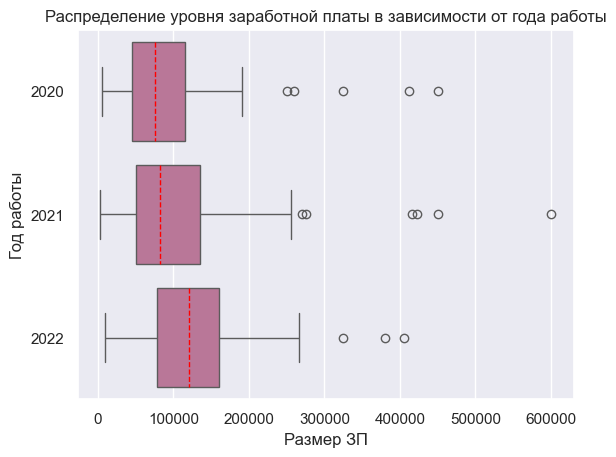

In [37]:

ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Год работы')
plt.title('Распределение уровня заработной платы в зависимости от года работы')
plt.show()

In [38]:
data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Уровень заработной платы в зависимости от года ')
data_agg

Уровень заработной платы в зависимости от года 


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


Исходя из данных графика видно, что у специалистов Data Scientist наблюдается ежегодный рост зарплат.  Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

***

Вопрос 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

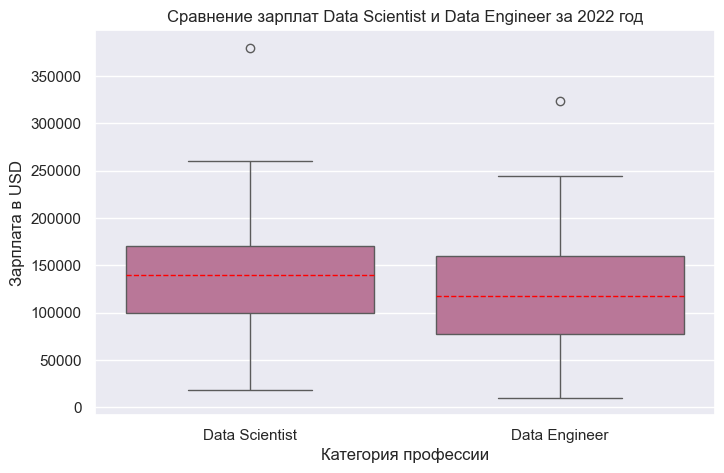

In [39]:
# Фильтруем профессии с 'scientist' или 'science' и добавляем категорию с профессией
df_scientist = data[data['job_title'].str.contains('scientist|science', case=False, na=False)].assign(category='Data Scientist')

# Фильтруем профессии с 'engineer'
df_engineer = data[data['job_title'].str.contains('engineer', case=False, na=False)].assign(category='Data Engineer')

# Оставляем только 2022 год
df_scientist = df_scientist[df_scientist['work_year'] == 2022]
df_engineer = df_engineer[df_engineer['work_year'] == 2022]

# Объединяем два датафрейма для сравнения
df = pd.concat([df_scientist, df_engineer])

# Строим boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='category', y='salary_in_usd', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Категория профессии', ylabel = 'Зарплата в USD')
plt.title('Сравнение зарплат Data Scientist и Data Engineer за 2022 год')

plt.show()

In [40]:
data_agg = df.groupby('category')['salary_in_usd'].describe().round(2).sort_values(by='mean')
print('Сравнение зарплат Data Scientist и Data Engineer за 2022 год')
data_agg

Сравнение зарплат Data Scientist и Data Engineer за 2022 год


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Data Engineer,109.0,121207.09,58868.65,10000.0,76940.0,117789.0,160080.0,324000.0
Data Scientist,89.0,136964.19,60406.81,18442.0,99360.0,140000.0,170000.0,380000.0


В 2022 году уровень ЗП у Data Engineer(121207.09$) меньше, чем у Data Scientist(136964.19$). Необходимо провести статистические тесты, чтобы узнать, являются ли эти различия значимыми.

***


Вопрос 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

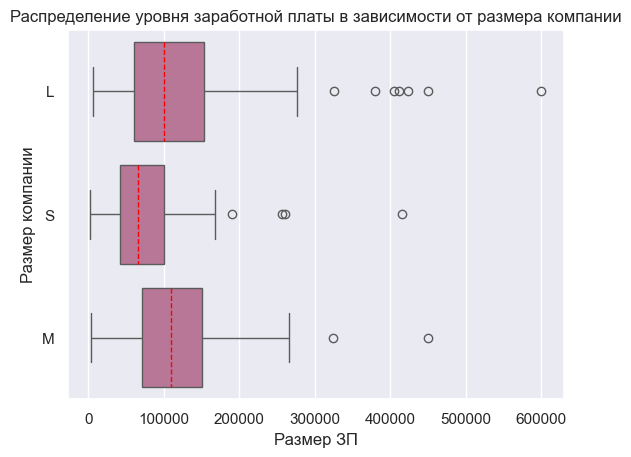

In [41]:
# Строим boxplot
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Размер компании')
plt.title('Распределение уровня заработной платы в зависимости от размера компании')
plt.show()

In [42]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2).sort_values(by='mean')
print('Распределение уровня заработной платы в зависимости от размера компании')
data_agg

Распределение уровня заработной платы в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
S,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0
M,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0
L,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0


Наибольший уровень ЗП у работников больших компаний - 118213.88$ в год, в средних компаниях средний уровень зп составляет 114807.08$, в маленьких компаниях - 77872.10$.  Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

***

Вопрос 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

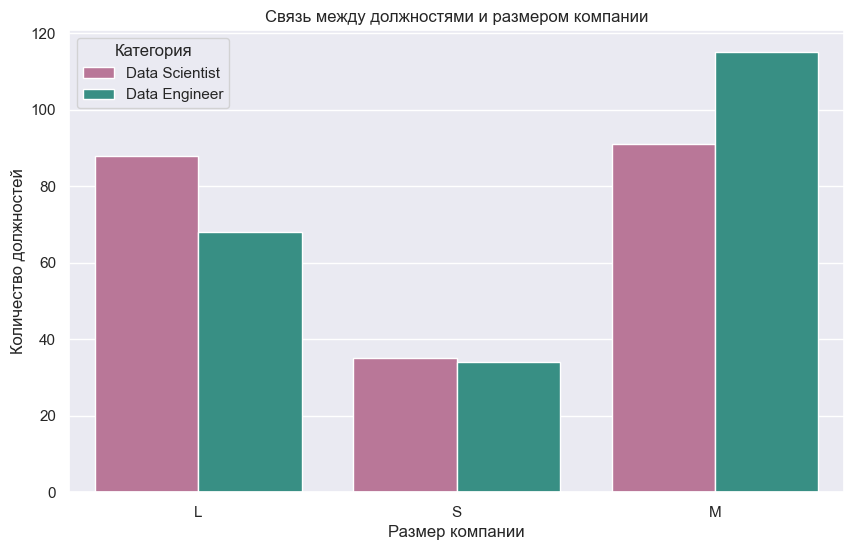

In [43]:
# Фильтруем профессии с 'scientist' или 'science' и добавляем категорию
df_scientist = data[data['job_title'].str.contains('scientist|science', case=False, na=False)].assign(category='Data Scientist')

# Фильтруем профессии с 'engineer' и добавляем категорию
df_engineer = data[data['job_title'].str.contains('engineer', case=False, na=False)].assign(category='Data Engineer')

# Объединяем два датафрейма
df_combined = pd.concat([df_scientist, df_engineer])

# Построение countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='company_size', hue='category')
plt.xlabel('Размер компании')
plt.ylabel('Количество должностей')
plt.title('Связь между должностями и размером компании')
plt.legend(title='Категория')
plt.show()


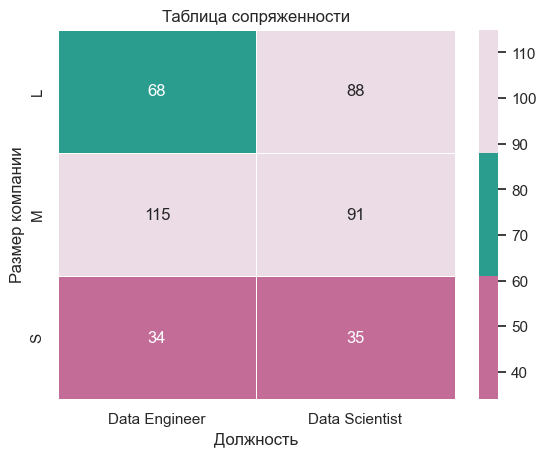

In [44]:


cross_tab = pd.crosstab(index=df_combined['company_size'], columns=df_combined['category'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap=custom_colors2)
ax.set(xlabel='Должность', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()

- Согласно данным в маленьких компаниях количество Data Scientist(35) почти не отличается от Data Engineer(34).

- В средних компаниях самое высокое количество и Data Scientist(91), и Data Engineer(115), также видно, что в средних компаниях количество Data Engineer больше, чем Data Scientist.

- В больших компаниях должностей Data Scientist(88) больше, чем Data Engineer(68).

### Вывод по визуальному анализу данных

Проанализировав данные, можно сказать, что на уровень зарплаты влияют следующие признаки: год работы, опыт работы, должность, страна работодателя, страна проживания сотрудников, формат работы и тип занятости.



1. Общие тенденции:
    Средняя зарплата в выборке составляет 110 610$, минимальная — 2 859$, максимальная — 600 000$. Распределение зарплат не является нормальным, присутствуют выбросы.

2. Формат работы и опыт:

    Полностью удаленная работа встречается чаще всего (346 записей), за ней следуют офисные вакансии (121) и частично удаленные (98).
    Большинство вакансий рассчитаны на Senior-level/Expert (243 записи), а наименьшее число позиций у Executive-level/Director (26).
    Полный рабочий день (FT) составляет 96% всех записей, а фриланс встречается реже всего (4 записи).

3. Должности и зарплаты:

    Топ-3 профессий: Data Scientist (130), Data Engineer (121), Data Analyst (82) — они составляют 60% всех вакансий.
    С увеличением опыта растет зарплата:
    Junior – 61 643$,
    Mid-level – 87 793$,
    Senior – 138 375$,
    Director – 199 392$. 
    Контрактные сотрудники (CT) получают самую высокую среднюю зарплату 184 575$, но имеют наибольший разброс.
    Руководящие и технические должности предлагают самые высокие зарплаты.
    Вакансии, связанные с машинным обучением и инженерией данных, наиболее конкурентоспособны.

4. География и компании:

    США лидирует как по количеству специалистов (295), так и работодателей (318), за ним следуют Великобритания и Индия.
    Средние компании (290 сотрудников) преобладают в выборке, за ними следуют крупные (193) и малые (82).
    Уровень зарплат выше в странах с высокой стоимостью жизни (США, Канада, Западная Европа). США лидирует по средней (144 292$) и медианной (135 000$) зарплате.


#### Выводы по вопросам исследования:

1. Уровень заработной платы повышается с каждым годом
2. Опыт работы и размер компании оказывают значительное влияние на уровень зарплаты.
3. В 2022 году уровень ЗП у Data Engineer(121207.09$) меньше, чем у Data Scientist(136964.19$).
4. Наибольший уровень ЗП у работников больших компаний - 118213.88$ в год, в средних компаниях средний уровень зп составляет 114807.08$, в маленьких компаниях - 77872.10$.
5. Связь между размером компании и наличием должностей Data Scientist и Data Engineer прослеживается: в маленьких компаниях их количество примерно одинаково (35 vs. 34), в средних Data Engineer больше (115 vs. 91), а в больших преобладают Data Scientist (88 vs. 68).
6. Для подтверждения значимости различий потребуется статистическое тестирование.

***

## 3. Статистический анализ данных

In [45]:
# функция для принятия решения о нормальности
def decision_normality(p):
    """Функция выводит решение о нормальности распределения
    Args:
        float: Число p-значения
        
    Returns:
        str: Строку со сзачением p-value и и решение о нормальности или ненормальности распределения
    """
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    """Функция выводит решение об отклонении нулевой гипотезы
    Args:
        float: Число p-значения
        
    Returns:
        str: Строку со сзачением p-value и и решение об отклонении или принятия нулевой гипотезы
    """
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

### Вопрос 1: Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?



**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы не отличается в разные годы: в 2022 году ($μ_1$), в 2021($μ_2$) году, в 2020 году ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза* ($H_1$): размер заработной платы отличается в разные годы: в 2022 году ($μ_1$), в 2021($μ_2$) году, в 2020 году ($μ_3$).

$$ H_1 : μ_1 > μ_2 > μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.


In [46]:
# значения заработной платы в разные года
salary_2022 = data.loc[data['work_year']==2022, 'salary_in_usd']
salary_2021 = data.loc[data['work_year']==2021, 'salary_in_usd']
salary_2020 = data.loc[data['work_year']==2020, 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для 2022 года:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Для 2020:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

Для 2022 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — 3.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [47]:
# проводим тест
_, p = stats.kruskal(salary_2022, salary_2021, salary_2020)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существуют статистически важные различия в уровнях ЗП в разные годы






***

**Далее проверим какие именно различия между зп, увеличивается ли с каждым годом зарплата DS специалистов?**

Сравним 2020 и 2021, затем 2021 и 2022 годы между собой

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы в 2020г.($μ_1$) выше или равен зп в 2021г.($μ_2$)

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработной платы в 2020г.($μ_1$) ниже зп в 2021г.($μ_2$)

$$ H_1 : μ_1 < μ_2

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — 2.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы используем U-критерий Манна-Уитни.

**Проведём тест**

In [48]:
# проводим тест
_, p = stats.mannwhitneyu(salary_2020, salary_2021, alternative='less')
decision_hypothesis(p)


p-value = 0.249
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


***

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы в 2021г.($μ_1$) выше или равен зп в 2022г.($μ_2$)

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработной платы в 2021г.($μ_1$) ниже зп в 2022г.($μ_2$)

$$ H_1 : μ_1 < μ_2 $$

Используем U-критерий Манна-Уитни

In [49]:
# проводим тест
_, p = stats.mannwhitneyu(salary_2021, salary_2022, alternative='less')
decision_hypothesis(p)


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Разница в зп между 2020 и 2021 годами статистически незначима, а между 2021 и 2022 годами имеются статистически значимые различия, есть основания утверждать, что наблюдается ежегодный рост зарплат у специалистов Data Scientist.

***

## Вопрос 2: Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): в 2022 году размер заработной платы у Data Scientist ($μ_1$) равен или меньше заработной платы Data Engineer ($μ_2$).

$$ H_0 : μ_1 <= μ_2 $$
*Альтернативная гипотеза* ($H_0$): в 2022 году размер заработной платы у Data Scientist ($μ_1$) больше заработной платы Data Engineer ($μ_2$).


$$ H_1 : μ_1 > μ_2 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.


In [50]:
# Фильтрация данных для 2022 года
data_2022 = data[data['work_year'] == 2022]

# Зарплаты Data Scientist и Data Engineer в 2022 году
salary_DS = data_2022.loc[data_2022['job_title'].str.contains('scientist|science', case=False, na=False), 'salary_in_usd']
salary_DE = data_2022.loc[data_2022['job_title'].str.contains('engineer', case=False, na=False), 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist:')
result = stats.shapiro(salary_DS)
decision_normality(result[1])

print('Для Data Engineer:')
result = stats.shapiro(salary_DE)
decision_normality(result[1])


Для Data Scientist:
p-value = 0.024
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для Data Engineer:
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — 2.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы используем U-критерий Манна-Уитни.

**Проведём тест**

In [51]:
# проводим тест
_, p = stats.mannwhitneyu(salary_DS, salary_DE, alternative='greater')
decision_hypothesis(p)

p-value = 0.025
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Уровень зарплаты Data Scientist выше, чем зп Data Engineer в 2022 году.

***

## Вопрос 3: Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Зарплаты специалистов Data Scientist не зависят от размера компании, то есть между зарплатами в крупных, средних и малых компаниях нет статистически значимых различий.



*Альтернативная гипотеза*($H_0$): Зарплаты специалистов Data Scientist зависят от размера компании, то есть существуют статистически значимые различия в зарплатах между крупными, средними и малыми компаниями.

In [52]:
# значения заработной платы в компаниях различного размера
salary_S = data.loc[data['company_size']=='S', 'salary_in_usd']
salary_M = data.loc[data['company_size']=='M', 'salary_in_usd']
salary_L = data.loc[data['company_size']=='L', 'salary_in_usd']

In [53]:
# проводим тест Шапиро-Уилка
print('Для компаний размера S:')
result = stats.shapiro(salary_S)
decision_normality(result[1])

print('Для компаний размера M:')
result = stats.shapiro(salary_M)
decision_normality(result[1])

print('Для компаний размера L:')
result = stats.shapiro(salary_L)
decision_normality(result[1])

Для компаний размера S:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для компаний размера M:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для компаний размера L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — 3.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы используем критерий Краскела - Уоллиса.

**Проведём тест**

In [54]:
# проводим тест
_, p = stats.kruskal(salary_S, salary_M, salary_L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Зарплаты специалистов Data Scientist зависят от размера компании, то есть существуют статистически значимые различия в зарплатах между крупными, средними и малыми компаниями.

## Вопрос 4: Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Нет зависимости между наличием должности Data Scientist и Data Engineer и размером компании.



*Альтернативная гипотеза*($H_0$): Существует зависимость между наличием должности Data Scientist/Data Engineer и размером компании.

In [55]:
# составляем таблицу сопряжённости
cross_tab = pd.crosstab(index=df_combined['company_size'], columns=df_combined['category'])
cross_tab

category,Data Engineer,Data Scientist
company_size,,
L,68,88
M,115,91
S,34,35


In [56]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_tab)
decision_hypothesis(p)

p-value = 0.069
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что существует зависимость между наличием должностей Data Scientist и Data Engineer и размером компании.


***
## Дополнительное исследование

Поставим 3 дополнительные бизнес задачи:

1. Как соотносятся зарплаты специалистов Data Scientist в зависимости от типа удаленной работы?
2. Существует ли статистически значимая разница в заработной плате с разным опытом работы?
3. Отличается ли средняя ЗП Data Scientist от 100000$?

#### 1. Как соотносятся зарплаты специалистов Data Scientist в зависимости от типа удаленной работы?

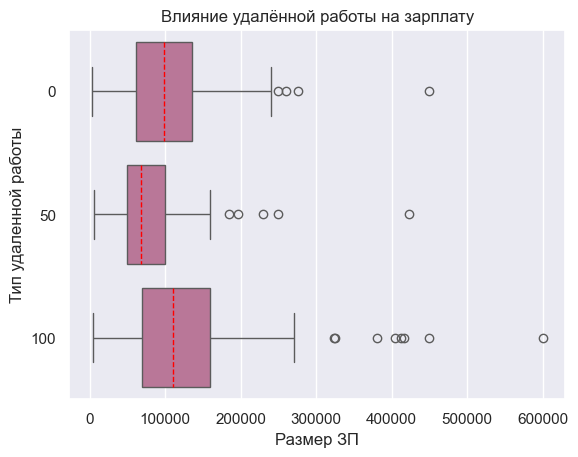

In [57]:
# Строим boxplot
ax = sns.boxplot(data, x='salary_in_usd', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Тип удаленной работы')
plt.title('Влияние удалённой работы на зарплату')
plt.show()

У сотрудников без удаленной работы медианная зарплата(98158$) выше, чем у сотрудников, работающих частично удаленно(68010.5$).
У полностью удаленных сотрудников медиана(110712.5$) находится выше, чем у тех, кто работает в офисе. 

Проверим, являются ли эти различия статистически значимыми:


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Зарплаты специалистов Data Scientist не зависят от типа удаленной работы, то есть между зарплатами сотрудников, работающих полностью удаленно, частично удаленно и без удаленной работы нет статистически значимых различий.



*Альтернативная гипотеза*($H_0$): Зарплаты специалистов Data Scientist зависят от типа удаленной работы, то есть существуют статистически значимые различия между зарплатами сотрудников, работающих полностью удаленно, частично удаленно и без удаленной работы.

In [58]:
# значения заработной платы с разним типом удаленки
salary_0 = data.loc[data['remote_ratio']==0, 'salary_in_usd']
salary_50 = data.loc[data['remote_ratio']==50, 'salary_in_usd']
salary_100 = data.loc[data['remote_ratio']==100, 'salary_in_usd']

In [59]:
# проводим тест Шапиро-Уилка
print('Для сотрудников без удаленной работы:')
result = stats.shapiro(salary_0)
decision_normality(result[1])

print('Для сотрудников с частично удаленной работой:')
result = stats.shapiro(salary_50)
decision_normality(result[1])

print('Для сотрудников с полностью удаленной работой:')
result = stats.shapiro(salary_100)
decision_normality(result[1])

Для сотрудников без удаленной работы:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для сотрудников с частично удаленной работой:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для сотрудников с полностью удаленной работой:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Для проверки нашей гипотезы используем критерий Краскела - Уоллиса.

In [60]:
# Проводим тест
_, p = stats.kruskal(salary_0, salary_50, salary_100)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу, зарплаты специалистов Data Scientist зависят от типа удаленной работы, то есть существуют статистически значимые различия между зарплатами сотрудников, работающих полностью удаленно, частично удаленно и без удаленной работы.

***


#### 2. Существует ли статистически значимая разница в заработной плате с разным опытом работы?

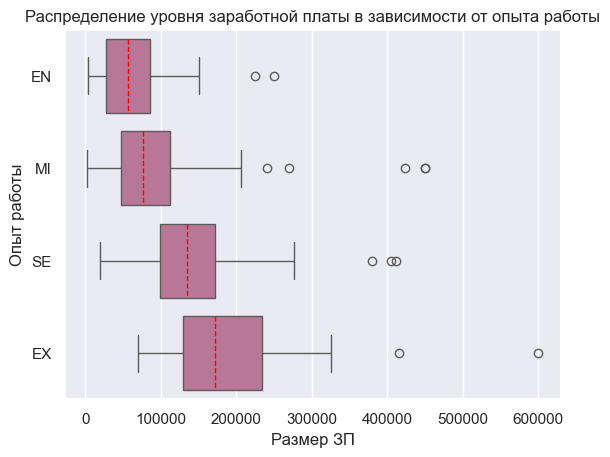

In [61]:
# Строим boxplot

ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', order=experience_order,  orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Опыт работы')
plt.title('Распределение уровня заработной платы в зависимости от опыта работы')
plt.show()

На графике видно, что с увеличением опыта работы увеличивается уровень заработной платы.

Проверим, являются ли эти различия статистически значимыми:

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Зарплаты специалистов Data Scientist не зависят от опыта работы, то есть между зарплатами сотрудников, имеющих разный опыт работы нет статистически значимых различий.



*Альтернативная гипотеза*($H_0$): Зарплаты специалистов Data Scientist зависят от опыта работы, то есть между зарплатами сотрудников, имеющих разный опыт работы есть статистически значимые различия.


In [62]:
# значения заработной платы с разным опытом работы
salary_EN = data.loc[data['experience_level']=='EN', 'salary_in_usd']
salary_MI = data.loc[data['experience_level']=='MI', 'salary_in_usd']
salary_SE = data.loc[data['experience_level']=='SE', 'salary_in_usd']
salary_EX = data.loc[data['experience_level']=='EX', 'salary_in_usd']

In [63]:
# проводим тест Шапиро-Уилка
print('Для Junior специалистов:')
result = stats.shapiro(salary_EN)
decision_normality(result[1])

print('Для Mid-level специалистов:')
result = stats.shapiro(salary_MI)
decision_normality(result[1])

print('Для Senior-level специалистов:')
result = stats.shapiro(salary_SE)
decision_normality(result[1])

print('Для Executive-leve специалистов:')
result = stats.shapiro(salary_EX)
decision_normality(result[1])

Для Junior специалистов:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для Mid-level специалистов:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для Senior-level специалистов:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для Executive-leve специалистов:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Для проверки нашей гипотезы используем критерий Краскела - Уоллиса.

In [64]:
# Проводим тест
_, p = stats.kruskal(salary_EN, salary_MI, salary_SE, salary_EX)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Отвергаем нулевую гипотезу, зарплаты специалистов Data Scientist зависят от опыта работы, то есть между зарплатами сотрудников, имеющих разный опыт работы есть статистически значимые различия.


***

#### 3. Отличается ли медианная ЗП Data Scientist от 100000$?

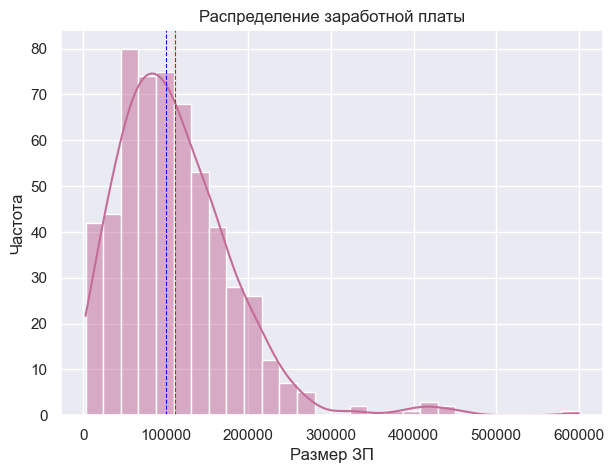

In [65]:

fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=ax)
ax.set(xlabel='Размер ЗП', ylabel='Частота')
ax.set_title('Распределение заработной платы')
ax.axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
ax.axvline(data['salary_in_usd'].median(), color='blue', linestyle='--', linewidth=0.8)

plt.show()

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Медианная зарплата Data Scientist не отличается от $100,000.

$$ H_0 : μ = 100000 $$
*Альтернативная гипотеза* ($H_1$): Медианная зарплата Data Scientist отличается от $100,000.


$$ H_1 : μ \neq 100000 $$


Для проверки нашей гипотезы используем критерий знаков.

In [66]:
# проводим тест Шапиро-Уилка
result = stats.shapiro(data['salary_in_usd'])
decision_normality(result[1])

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [67]:

# Проведем тест

_, p = sign_test(data['salary_in_usd'], 1e5)
decision_hypothesis(p)

p-value = 0.966
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

У нас нет оснований отвергнуть нулевую гипотезу. Медианная зарплата Data Scientist статистически не отличается от $100,000.

***

## Выводы по исследованию:

На основе анализа данных можно сделать следующие выводы:

Факторы, влияющие на заработную плату: 

Зарплата в сфере Data Science определяется комплексом признаков: год работы, опыт, должность, страна работодателя и проживания, формат работы и тип занятости.

1. Общие тенденции:
Средняя зарплата составляет около 110 610 долларов, диапазон значений варьируется от 2 859 до 600 000 долларов, а распределение характеризуется наличием выбросов и асимметрией. Это свидетельствует о высокой вариативности условий труда и компенсационных схем.

2. Формат работы и уровень опыта:
Полностью удаленная работа наиболее распространена, за ней следуют офисные и частично удаленные вакансии. Большинство вакансий рассчитаны на специалистов уровня Senior/Expert, что отражает высокий спрос на опытных профессионалов, в то время как вакансии для руководителей высшего звена встречаются реже. При этом преобладает полный рабочий день, а фриланс-сотрудничество практически не представлено.

3. Должностные различия и зарплатная динамика:
Топ-3 профессии (специалист по обработке данных, инженер по обработке данных и аналитик данных) составляют 60% всех вакансий. Зарплата существенно растет с опытом: от ~61 643$ для младших специалистов до ~199 392$ для директоров. В 2022 году специалисты по обработке данных получают больше, чем инженеры, а сотрудники на контракте, несмотря на высокий средний уровень оплаты (около 184 575$), демонстрируют наибольший разброс зарплат.

4. Географические и корпоративные аспекты:
США лидируют по количеству специалистов и работодателей, а также демонстрируют самые высокие средние (144 292$) и медианные (135 000$) зарплаты. В выборке преобладают вакансии в средних компаниях, за которыми следуют крупные и малые организации, при этом размер компании заметно влияет на уровень оплаты: лучшие условия наблюдаются в крупных компаниях.

В совокупности результаты исследования подтверждают, что опыт, должность, формат работы и размер компании являются ключевыми факторами, определяющими уровень заработной платы в сфере Data Science. При этом, несмотря на общий рост зарплат с годами, значительная вариативность и наличие «выбросов» требуют учёта специфики каждого сегмента рынка для принятия обоснованных решений как специалистами, так и работодателями.


### Выводы по вопросам исследования:

**1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**

Разница в зарплатах между 2021 и 2022 годами статистически значима, а между 2020 и 2021 годами — нет.
Таким образом, ежегодный рост зарплат подтверждается.

**2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**

Зарплата Data Scientist выше, чем у Data Engineer.


**3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**

Зарплаты специалистов Data Scientist зависят от размера компании, то есть существуют статистически значимые различия в зарплатах между крупными, средними и малыми компаниями.
Таким образом, специалисты по анализу данных зарабатывают несколько больше в крупных компаниях по сравнению со средними, а в малых компаниях уровень оплаты существенно ниже.

**4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**

Нет статистически значимой связи между наличием должностей Data Scientist и Data Engineer и размером компании.

**5. Как соотносятся зарплаты специалистов Data Scientist в зависимости от типа удаленной работы?**

Зарплаты специалистов Data Scientist зависят от типа удаленной работы, то есть существуют статистически значимые различия между зарплатами сотрудников, работающих полностью удаленно, частично удаленно и без удаленной работы.

**6. Существует ли статистически значимая разница в заработной плате с разным опытом работы?**

Зарплаты специалистов Data Scientist зависят от опыта работы, то есть между зарплатами сотрудников, имеющих разный опыт работы есть статистически значимые различия.

**7. Отличается ли средняя ЗП Data Scientist от 100000$?**

Медианная зарплата специалиста по анализу данных статистически не отличается от 100 000$.

